**House Prices - Advanced Regression Techniques**

Predict sale price in dollars

Information about variables  are placed in the  ***data_description.txt***

**Data Dictionary**
- SalePrice - the property's sale price in dollars. This is the target variable - that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import libraries and Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_path = '/content/drive/MyDrive/dataML/House_Prices/train.csv'
test_path = '/content/drive/MyDrive/dataML/House_Prices/test.csv'
data_train =  pd.read_csv(train_path)
data_test = pd.read_csv(test_path)


**Looking into the train and test dataset**

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Printing first 5 rows of the train and test datasets.

**Describing datasets**

In [5]:
print(" Train data: \n Size: Number of rows %d; Number of columns %d."%data_train.shape)
print(data_train.info(),'\n')

print(" Test data: \n Size: Number of rows %d; Number of columns %d."%data_test.shape)
print(data_test.info())

 Train data: 
 Size: Number of rows 1460; Number of columns 81.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   o

**Do some analysis on SalePrice variable**

SalePrice is the variable we need to predict


 Skewness =  1.88  и Kurtosis = 6.54 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


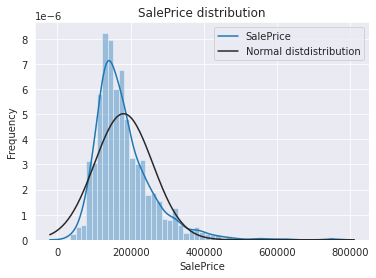

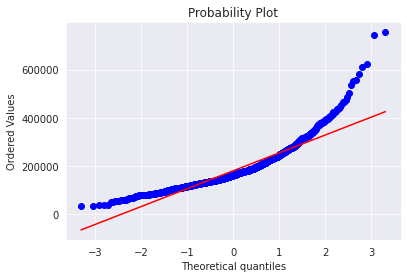

In [6]:
from scipy import stats
from scipy.stats import norm, skew

color = sns.color_palette()
sns.set_style('darkgrid')

sns.distplot(data_train['SalePrice'] , fit=norm);

As = data_train['SalePrice'].skew()
Es = data_train['SalePrice'].kurt()
print( '\n Skewness = {: .2f}  и Kurtosis = {:.2f} \n'.format(As,Es))

plt.legend(['SalePrice','Normal distdistribution'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#  QQ-plot
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()

QQ-plot is used to compare two distributions by plotting their quantiles relative to each other. In this case, these will be the quantiles of the theoretical distribution and the distribution of the variable. 

The SalePrice variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

**Log-transformation of the target variable (SalePrice)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 Skewness =  0.12  и Kurtosis = 0.81 



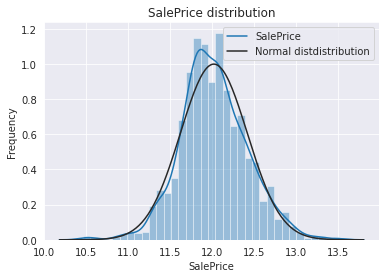

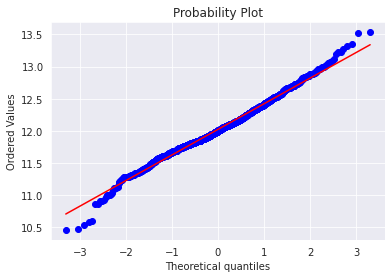

In [7]:
# log1p  log(1+x)

data_train["SalePrice"] = np.log1p(data_train["SalePrice"])

sns.distplot(data_train['SalePrice'] , fit=norm);
As = data_train['SalePrice'].skew()
Es = data_train['SalePrice'].kurt()
print( '\n Skewness = {: .2f}  и Kurtosis = {:.2f} \n'.format(As,Es))
plt.legend(['SalePrice','Normal distdistribution'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#  QQ-plot
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()



The skew seems now corrected and the data appears more normally distributed.

**Features engineering**

In [8]:
ntrain = data_train.shape[0]
ntest = data_test.shape[0]
y_train = data_train.SalePrice.values

# Save the 'Id' column for submission
test_ID = data_test['Id']

train_test_data = pd.concat((data_train, data_test)).reset_index(drop=True)
train_test_data.drop(['SalePrice'], axis=1, inplace=True)
train_test_data.drop(['Id'], axis=1, inplace=True)
print("Size of train_test_data: {}".format(train_test_data.shape))

Size of train_test_data: (2919, 79)


**Data Correlation**

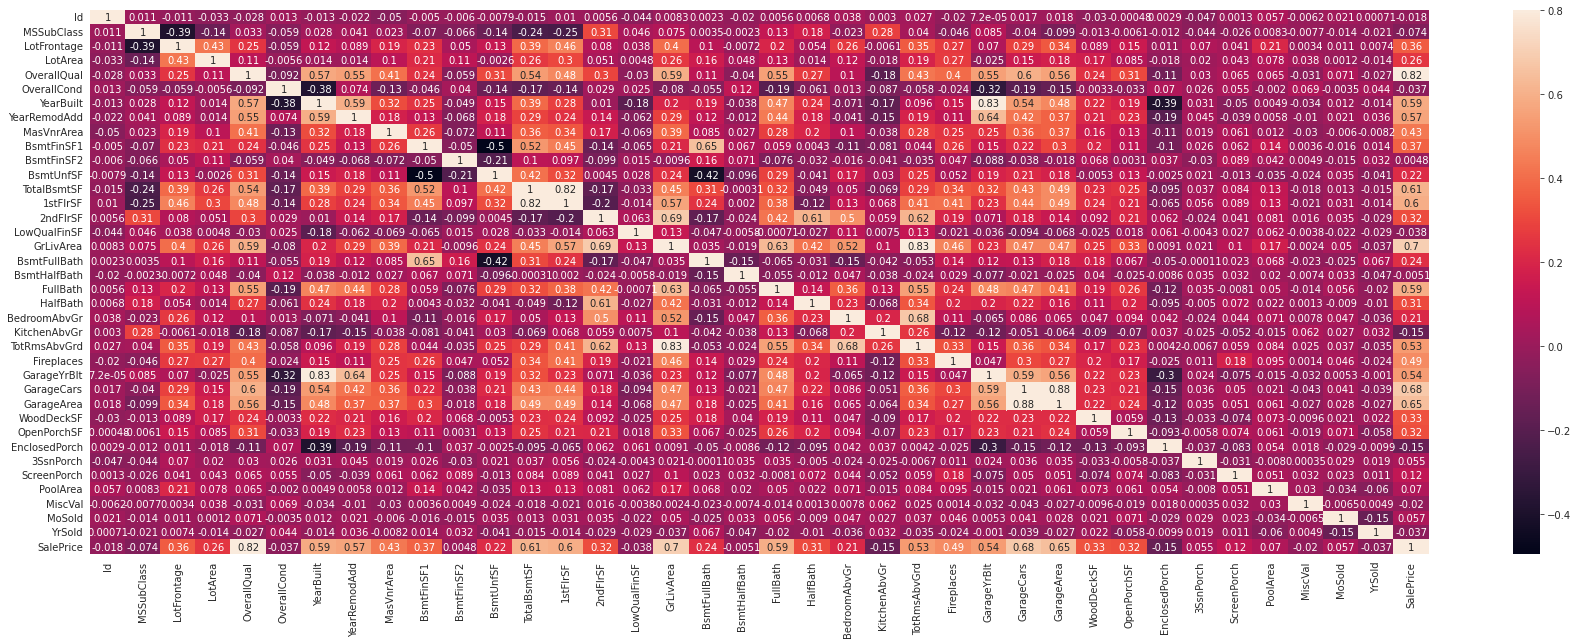

In [9]:
#Correlation map
corrmat = data_train.corr()
f, ax = plt.subplots(figsize = (30, 10))
sns.heatmap(corrmat, vmax= 0.8, annot = True);

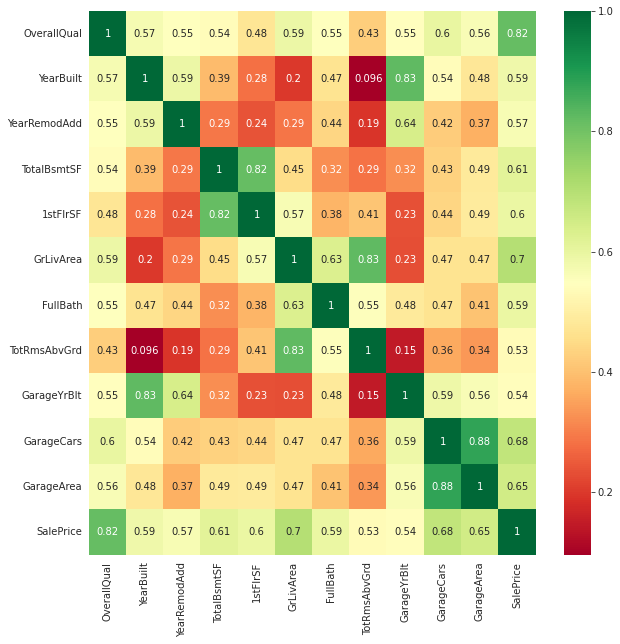

In [10]:
# The most correlated  features
top_cor_features = corrmat.index [abs(corrmat["SalePrice"]) > 0.5 ]
plt.figure( figsize= (10,10))
g = sns.heatmap(data_train[top_cor_features].corr(), annot = True, cmap = "RdYlGn")

SalePrice correlates best with GrLivArea and OverallQual

**Missing Data**

              Missing Ratio  Amount missing values
PoolQC            99.657417                   2909
MiscFeature       96.402878                   2814
Alley             93.216855                   2721
Fence             80.438506                   2348
FireplaceQu       48.646797                   1420
LotFrontage       16.649538                    486
GarageFinish       5.447071                    159
GarageYrBlt        5.447071                    159
GarageQual         5.447071                    159
GarageCond         5.447071                    159
GarageType         5.378554                    157
BsmtExposure       2.809181                     82
BsmtCond           2.809181                     82
BsmtQual           2.774923                     81
BsmtFinType2       2.740665                     80
BsmtFinType1       2.706406                     79
MasVnrType         0.822199                     24
MasVnrArea         0.787941                     23
MSZoning           0.137033    

Text(0.5, 1.0, 'Percent missing data by feature')

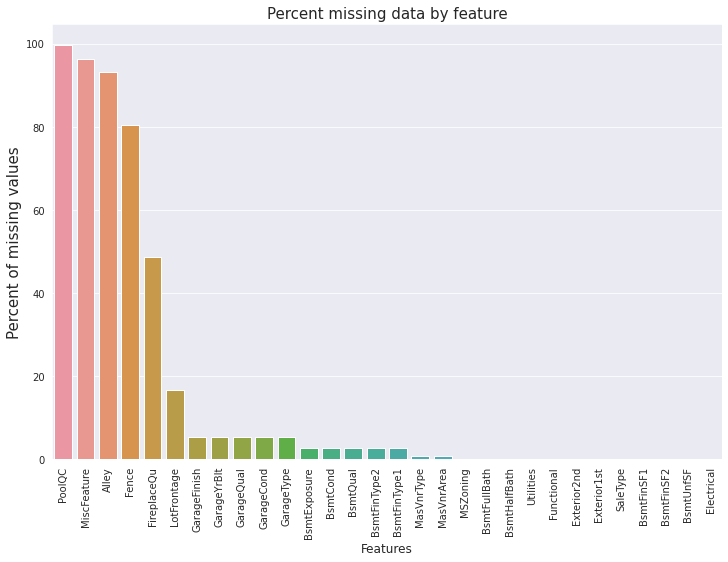

In [11]:
NA_number = train_test_data.isnull().sum()
NA_number = NA_number.drop(NA_number[NA_number == 0].index).sort_values(ascending=False)[:30]
train_test_data_NA = (train_test_data.isnull().sum() / len(train_test_data)) * 100
train_test_data_NA = train_test_data_NA.drop(train_test_data_NA[train_test_data_NA == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : train_test_data_NA, 'Amount missing values' : NA_number })
print(missing_data.head(20))

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_test_data_NA.index, y=train_test_data_NA)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Imputing missing values**

In [12]:
# PoolQC : data description says NA means "No Pool". 
train_test_data["PoolQC"] = train_test_data["PoolQC"].fillna("None")

# MiscFeature :  NA means "no misc feature"
train_test_data["MiscFeature"] = train_test_data["MiscFeature"].fillna("None")

# Alley :  NA means "no alley access"
train_test_data["Alley"] = train_test_data["Alley"].fillna("None")

#Fence :  NA means "no fence"
train_test_data["Fence"] = train_test_data["Fence"].fillna("None")

#FireplaceQu :  NA means "no fireplace"
train_test_data["FireplaceQu"] = train_test_data["FireplaceQu"].fillna("None")

#LotFrontage : fill in missing values by the median LotFrontage of the neighborhood (Group by neighborhood and fill in missing value)
train_test_data["LotFrontage"] = train_test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_test_data[col] = train_test_data[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_test_data[col] = train_test_data[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely 0 (no basement)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test_data[col] = train_test_data[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means that there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test_data[col] = train_test_data[col].fillna('None')

# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type
train_test_data["MasVnrType"] = train_test_data["MasVnrType"].fillna('None')
train_test_data["MasVnrArea"] = train_test_data["MasVnrArea"].fillna(0)

# MSZoning : fill in missing values with the most common value
train_test_data['MSZoning'] = train_test_data['MSZoning'].fillna(train_test_data['MSZoning'].mode()[0])

# Utilities : this feature won't help in predictive modelling
train_test_data = train_test_data.drop(['Utilities'], axis = 1)

# Functional :  NA means typical
train_test_data["Functional"] = train_test_data["Functional"].fillna("Typ")

# Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType : Fill in missing values with the most common value
train_test_data['Electrical'] = train_test_data['Electrical'].fillna(train_test_data['Electrical'].mode()[0])
train_test_data['KitchenQual'] = train_test_data['KitchenQual'].fillna(train_test_data['KitchenQual'].mode()[0])
train_test_data['Exterior1st'] = train_test_data['Exterior1st'].fillna(train_test_data['Exterior1st'].mode()[0])
train_test_data['Exterior2nd'] = train_test_data['Exterior2nd'].fillna(train_test_data['Exterior2nd'].mode()[0])
train_test_data['SaleType'] = train_test_data['SaleType'].fillna(train_test_data['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class
train_test_data['MSSubClass'] = train_test_data['MSSubClass'].fillna("None")

print('Missing value :',str(train_test_data.isnull().values.sum()))


Missing value : 0


Transforming some numerical variables that are really categorical

In [13]:
#MSSubClass = The building class
train_test_data['MSSubClass'] = train_test_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train_test_data['OverallCond'] = train_test_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train_test_data['YrSold'] = train_test_data['YrSold'].astype(str)
train_test_data['MoSold'] = train_test_data['MoSold'].astype(str)

Label Encoding some categorical variables

In [14]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_test_data[c].values)) 
    train_test_data[c] = lbl.transform(list(train_test_data[c].values))   

# Adding total sqfootage feature 
train_test_data['TotalSF'] = train_test_data['TotalBsmtSF'] + train_test_data['1stFlrSF'] + train_test_data['2ndFlrSF']

print('Size of train_test_data: {}'.format(train_test_data.shape))

Size of train_test_data: (2919, 79)


**Numerical features**

In [15]:
# Check the skew of all numerical features

numeric_feats = train_test_data.dtypes[train_test_data.dtypes != "object"].index

skewed_feats = train_test_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

print(skewness.head(10))

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to transform".format(skewness.shape[0]))

skewed_features = skewness.index
train_test_data[skewed_features] = np.log1p(train_test_data[skewed_features])

Skew in numerical features: 

                    Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
There are 59 skewed numerical features to transform


**Getting dummy categorical features**



In [16]:
# Create dummy features for categorical values via one-hot encoding
train_test_data = pd.get_dummies(train_test_data)
print('Size of train_test_data: {}'.format(train_test_data.shape))

Size of train_test_data: (2919, 221)


**Modelling**

In [17]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Getting the new train and test sets.
train = train_test_data[:ntrain]
test = train_test_data[ntrain:]

#Validation function
n_folds = 5

# RMSE Root Mean Square Error 
# The RMSE measures the distance between our predicted values and actual values
# RMSLE Root Mean Squared Log Error
# RMSLE metric only considers the relative error between and the Predicted and the actual value and the scale of the error is not significant.
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
    
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Base models:

In [18]:
# LASSO Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# Elastic Net Regression 
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.5, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.45, gamma=0.045, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2500,
                             reg_alpha=0.45, reg_lambda=0.86,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1235 (0.0150)

ElasticNet score: 0.1236 (0.0151)

Kernel Ridge score: 0.1268 (0.0131)

Gradient Boosting score: 0.1234 (0.0122)

Xgboost score: 0.1225 (0.0084)



 Averaging base models:

In [19]:
# Averaged base models class
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

We just average 3 models here lasso, ENet and GBoost

In [20]:
averaged_model = AveragingModels(models =(lasso, ENet, GBoost))
score = rmsle_cv(averaged_model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1188 (0.0140)



Final Training:

In [21]:
averaged_model.fit(train, y_train)
averaged_model_train_pred = averaged_model.predict(train)
print('RMSLE Averaged models: {}'.format(rmsle(y_train, averaged_model_train_pred)))

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
print('RMSLE XGBoost: {}'.format(rmsle(y_train, xgb_train_pred)))

RMSLE Averaged models: 0.08549759706768538
RMSLE XGBoost: 0.07706162080254846


**Create Submission File**

Let's perform the reverse operation log1p : expm1

*log1p(x)*  calculate log(1 + x)

*expm1(x)* calculate exp(x) - 1

In [22]:
xgb_pred = np.expm1(model_xgb.predict(test))
av_model_pred = np.expm1(averaged_model.predict(test))

# Ensemble prediction:
ensemble = av_model_pred*1/2 + xgb_pred*1/2

Submission = pd.DataFrame()
Submission['Id'] = test_ID
Submission['SalePrice'] = ensemble
Submission.head()
#Submission.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,120621.438259
1,1462,157615.053057
2,1463,184996.326917
3,1464,194801.353296
4,1465,190900.327303
